In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df_maker_place = pd.read_csv('/content/EV Maker by Place.csv')
df_category = pd.read_csv('/content/ev_cat_01-24.csv')
df_sales = pd.read_csv('/content/ev_sales_by_makers_and_cat_15-24.csv')
df_operational = pd.read_csv('/content/OperationalPC.csv')
df_vehicle_class = pd.read_csv('/content/Vehicle Class - All.csv')

In [4]:
df_maker_place = pd.read_csv('/content/EV Maker by Place.csv')
df_maker_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [5]:
df_category = pd.read_csv('/content/ev_cat_01-24.csv')
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             284 non-null    object
 1   FOUR WHEELER (INVALID CARRIAGE)  284 non-null    int64 
 2   HEAVY GOODS VEHICLE              284 non-null    int64 
 3   HEAVY MOTOR VEHICLE              284 non-null    int64 
 4   HEAVY PASSENGER VEHICLE          284 non-null    int64 
 5   LIGHT GOODS VEHICLE              284 non-null    int64 
 6   LIGHT MOTOR VEHICLE              284 non-null    int64 
 7   LIGHT PASSENGER VEHICLE          284 non-null    int64 
 8   MEDIUM GOODS VEHICLE             284 non-null    int64 
 9   MEDIUM PASSENGER VEHICLE         284 non-null    int64 
 10  MEDIUM MOTOR VEHICLE             284 non-null    int64 
 11  OTHER THAN MENTIONED ABOVE       284 non-null    int64 
 12  THREE WHEELER(NT)                284

In [6]:
df_sales = pd.read_csv('/content/ev_sales_by_makers_and_cat_15-24.csv')
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cat     1386 non-null   object
 1   Maker   1386 non-null   object
 2   2015    1386 non-null   int64 
 3   2016    1386 non-null   int64 
 4   2017    1386 non-null   int64 
 5   2018    1386 non-null   int64 
 6   2019    1386 non-null   int64 
 7   2020    1386 non-null   int64 
 8   2021    1386 non-null   int64 
 9   2022    1386 non-null   int64 
 10  2023    1386 non-null   int64 
 11  2024    1386 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 130.1+ KB


In [7]:
df_operational = pd.read_csv('/content/OperationalPC.csv')
df_operational.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   34 non-null     object
 1   No. of Operational PCS  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 676.0+ bytes


In [8]:
df_vehicle_class = pd.read_csv('/content/Vehicle Class - All.csv')
df_vehicle_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle Class       16 non-null     object
 1   Total Registration  16 non-null     object
dtypes: object(2)
memory usage: 388.0+ bytes


In [3]:
print("=== df_maker_place ===")
print(df_maker_place.info())
print(df_maker_place.isnull().sum())

print("\n=== df_category ===")
print(df_category.info())
print(df_category.isnull().sum())

print("\n=== df_sales ===")
print(df_sales.info())
print(df_sales.isnull().sum())

print("\n=== df_operational ===")
print(df_operational.info())
print(df_operational.isnull().sum())

print("\n=== df_vehicle_class ===")
print(df_vehicle_class.info())
print(df_vehicle_class.isnull().sum())

=== df_maker_place ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB
None
EV Maker    0
Place       0
State       0
dtype: int64

=== df_category ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             284 non-null    object
 1   FOUR WHEELER (INVALID CARRIAGE)  284 non-null    int64 
 2   HEAVY GOODS VEHICLE              284 non-null    int64 
 3   HEAVY MOTOR VEHICLE              284 non-null    int64 
 4   HEAVY PASSENGER VEHICLE          284 non-null    int64 
 5   LIGHT GOODS VEHICLE        

In [9]:
sns.set(style="whitegrid")

In [15]:
df_count = df_maker_place.groupby(['EV Maker', 'Place']).size().reset_index(name='Count')

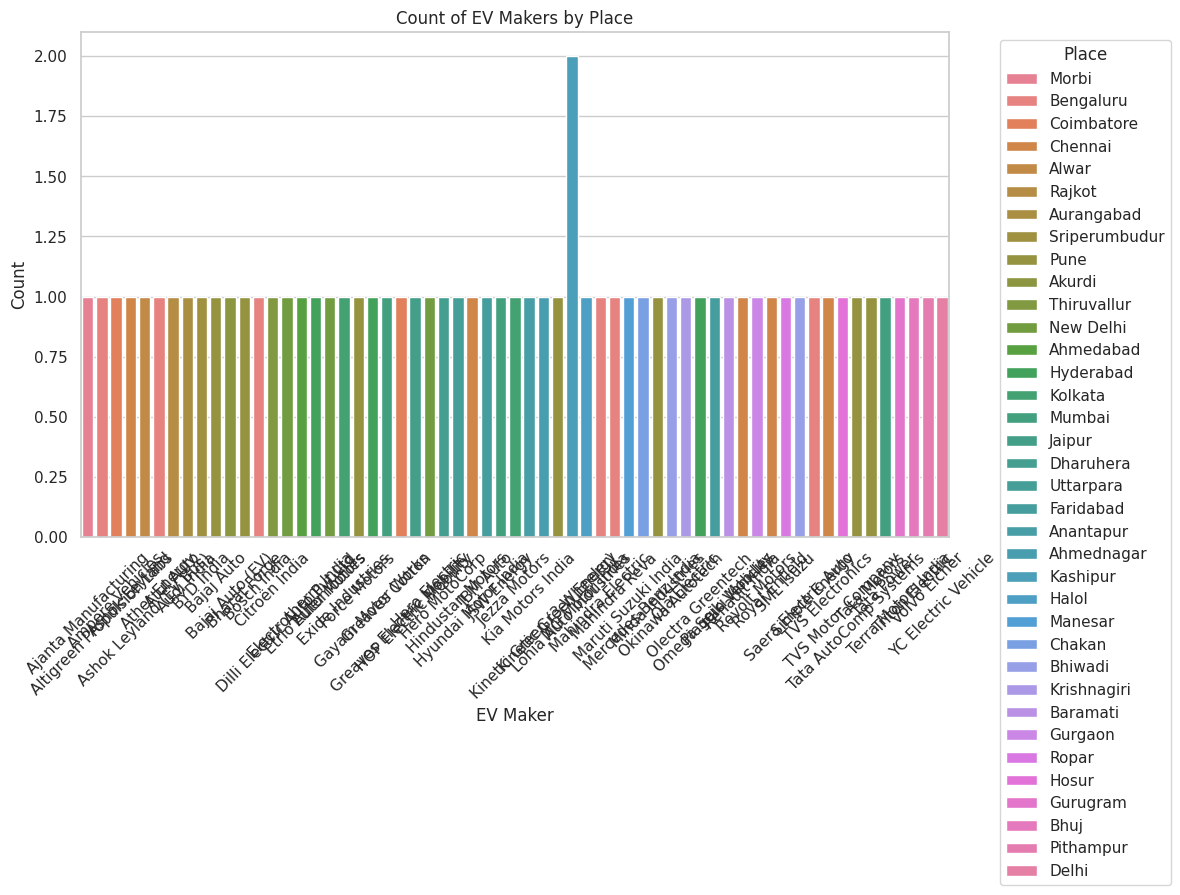

In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_count, x='EV Maker', y='Count', hue='Place')  # Use 'EV Maker' and 'Count'
plt.title('Count of EV Makers by Place')
plt.xlabel('EV Maker')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Place', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [23]:
print("Unique values in the Date column:")
print(df_category['Date'].unique())

Unique values in the Date column:
['0' '01/01/01' '01/01/02' '01/01/03' '01/01/04' '01/01/05' '01/01/06'
 '01/01/07' '01/01/08' '01/01/09' '01/01/10' '01/01/11' '01/01/12'
 '01/01/13' '01/01/14' '01/01/15' '01/01/16' '01/01/17' '01/01/18'
 '01/01/19' '01/01/20' '01/01/21' '01/01/22' '01/01/23' '01/01/24'
 '01/02/01' '01/02/02' '01/02/03' '01/02/04' '01/02/05' '01/02/06'
 '01/02/07' '01/02/08' '01/02/09' '01/02/10' '01/02/11' '01/02/12'
 '01/02/13' '01/02/14' '01/02/15' '01/02/16' '01/02/17' '01/02/18'
 '01/02/19' '01/02/20' '01/02/21' '01/02/22' '01/02/23' '01/02/24'
 '01/03/01' '01/03/02' '01/03/03' '01/03/04' '01/03/05' '01/03/06'
 '01/03/07' '01/03/08' '01/03/09' '01/03/10' '01/03/11' '01/03/12'
 '01/03/13' '01/03/14' '01/03/15' '01/03/16' '01/03/17' '01/03/18'
 '01/03/19' '01/03/20' '01/03/21' '01/03/22' '01/03/23' '01/03/24'
 '01/04/01' '01/04/02' '01/04/03' '01/04/04' '01/04/05' '01/04/06'
 '01/04/07' '01/04/08' '01/04/09' '01/04/10' '01/04/11' '01/04/12'
 '01/04/13' '01/04/14' '

In [24]:
invalid_dates = df_category[~df_category['Date'].str.match(r'^\d{1,2}/\d{1,2}/\d{2,4}$')]
print("Rows with invalid date formats:")
print(invalid_dates)

Rows with invalid date formats:
  Date  FOUR WHEELER (INVALID CARRIAGE)  HEAVY GOODS VEHICLE  \
0    0                                0                    0   

   HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  LIGHT GOODS VEHICLE  \
0                    0                        0                    0   

   LIGHT MOTOR VEHICLE  LIGHT PASSENGER VEHICLE  MEDIUM GOODS VEHICLE  \
0                    0                        0                     0   

   MEDIUM PASSENGER VEHICLE  MEDIUM MOTOR VEHICLE  OTHER THAN MENTIONED ABOVE  \
0                         0                     0                           0   

   THREE WHEELER(NT)  TWO WHEELER (INVALID CARRIAGE)  THREE WHEELER(T)  \
0                  0                               0                 0   

   TWO WHEELER(NT)  TWO WHEELER(T)  
0                0               0  


In [25]:
df_category['Date'] = pd.to_datetime(df_category['Date'], errors='coerce')

<ipython-input-25-ebd578a3a9f6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_category['Date'] = pd.to_datetime(df_category['Date'], errors='coerce')


In [26]:
print("Rows with NaT values after conversion:")
print(df_category[df_category['Date'].isna()])

Rows with NaT values after conversion:
  Date  FOUR WHEELER (INVALID CARRIAGE)  HEAVY GOODS VEHICLE  \
0  NaT                                0                    0   

   HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  LIGHT GOODS VEHICLE  \
0                    0                        0                    0   

   LIGHT MOTOR VEHICLE  LIGHT PASSENGER VEHICLE  MEDIUM GOODS VEHICLE  \
0                    0                        0                     0   

   MEDIUM PASSENGER VEHICLE  MEDIUM MOTOR VEHICLE  OTHER THAN MENTIONED ABOVE  \
0                         0                     0                           0   

   THREE WHEELER(NT)  TWO WHEELER (INVALID CARRIAGE)  THREE WHEELER(T)  \
0                  0                               0                 0   

   TWO WHEELER(NT)  TWO WHEELER(T)  
0                0               0  


In [27]:
df_category.set_index('Date', inplace=True)

In [28]:
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [33]:
df_category.reset_index(inplace=True)

In [34]:
df_melted = df_category.melt(id_vars=['Date'], var_name='Vehicle Type', value_name='Count')


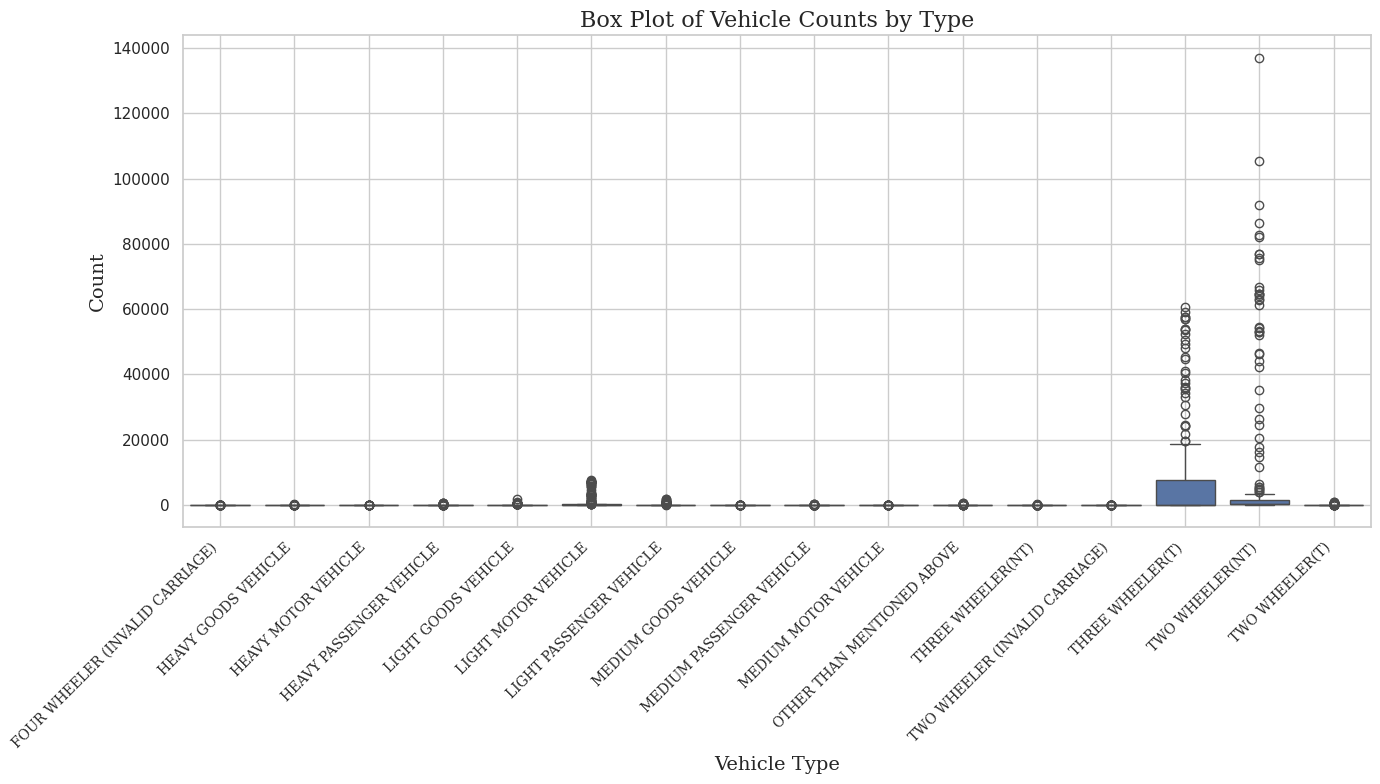

In [35]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Vehicle Type', y='Count', data=df_melted)

plt.title('Box Plot of Vehicle Counts by Type', fontsize=16, family='serif')
plt.xlabel('Vehicle Type', fontsize=14, family='serif')
plt.ylabel('Count', fontsize=14, family='serif')
plt.xticks(rotation=45, ha='right', fontsize=10, family='serif')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
df_heatmap = df_sales.set_index(['Cat', 'Maker']).T

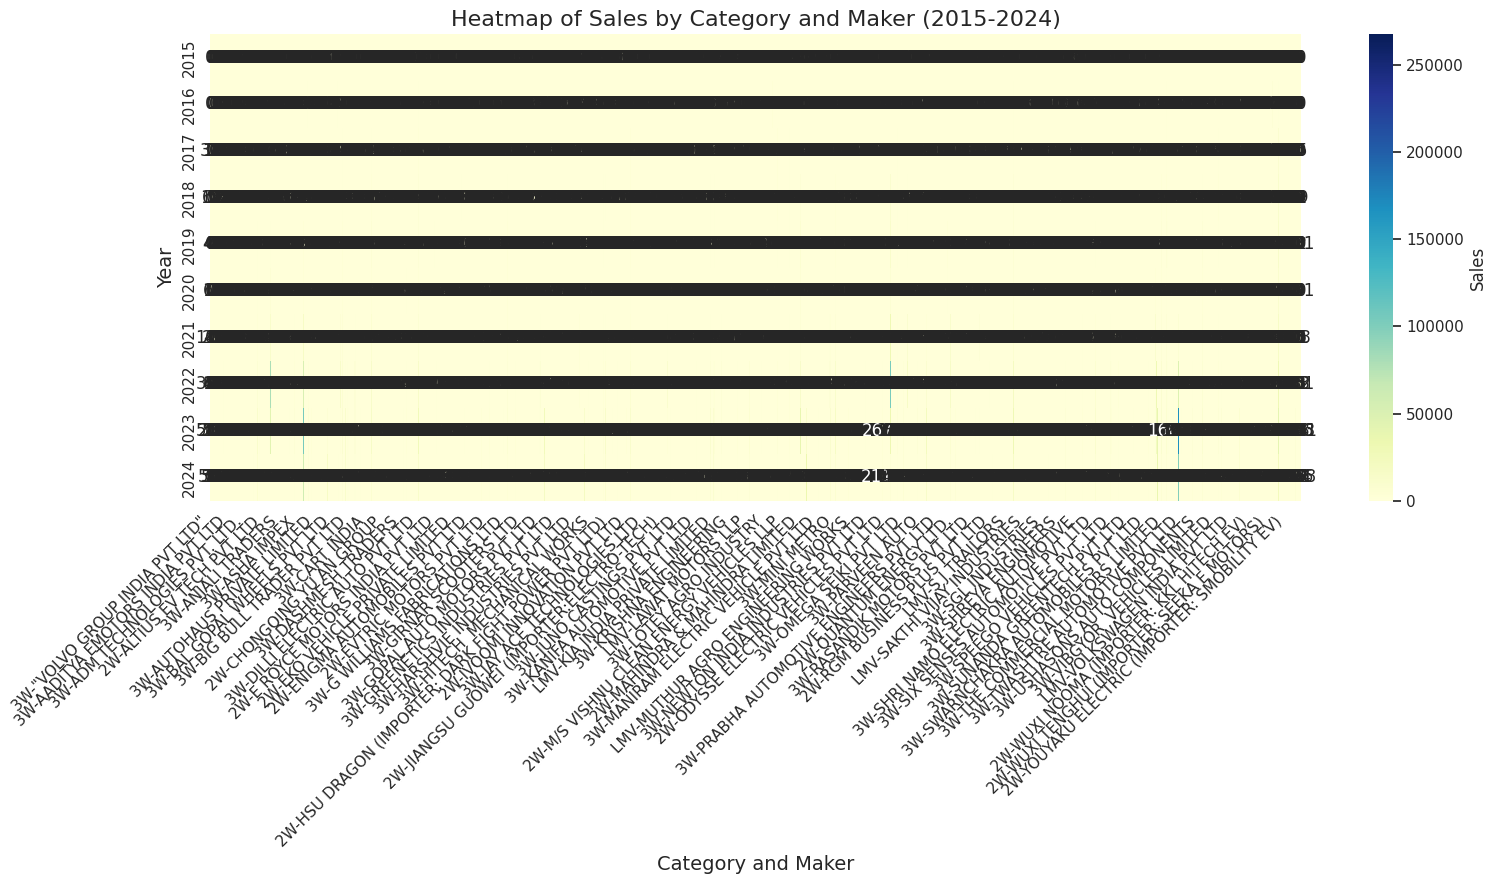

In [39]:
plt.figure(figsize=(16, 9))
sns.heatmap(df_heatmap, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Sales'})

plt.title('Heatmap of Sales by Category and Maker (2015-2024)', fontsize=16)
plt.xlabel('Category and Maker', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
print("Original column names:")
print(df_operational.columns)

Original column names:
Index(['State', 'No. of Operational PCS'], dtype='object')


In [45]:
df_operational.rename(columns={'No. of Operational PCS': 'No_of_Operational_PCS'}, inplace=True)


In [46]:
print("Renamed column names:")
print(df_operational.columns)

Renamed column names:
Index(['State', 'No_of_Operational_PCS'], dtype='object')


<ipython-input-47-b2b97d918dee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_operational, x='State', y='No_of_Operational_PCS', palette='viridis')


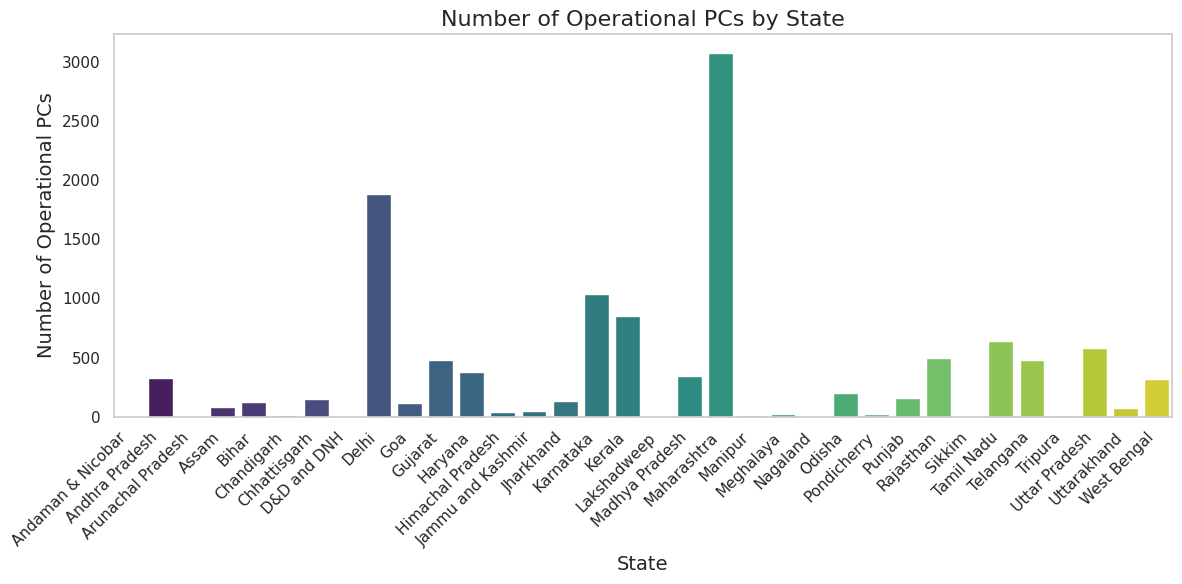

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_operational, x='State', y='No_of_Operational_PCS', palette='viridis')

plt.title('Number of Operational PCs by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Operational PCs', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [48]:
print("Original data types:")
print(df_vehicle_class.dtypes)

Original data types:
Vehicle Class         object
Total Registration    object
dtype: object


In [49]:
df_vehicle_class['Total Registration'] = df_vehicle_class['Total Registration'].str.replace(',', '').astype(int)

In [50]:
print("Data types after cleaning:")
print(df_vehicle_class.dtypes)

Data types after cleaning:
Vehicle Class         object
Total Registration     int64
dtype: object


<ipython-input-51-dc59b99f3bc6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_vehicle_class, x='Vehicle Class', y='Total Registration', palette='viridis')


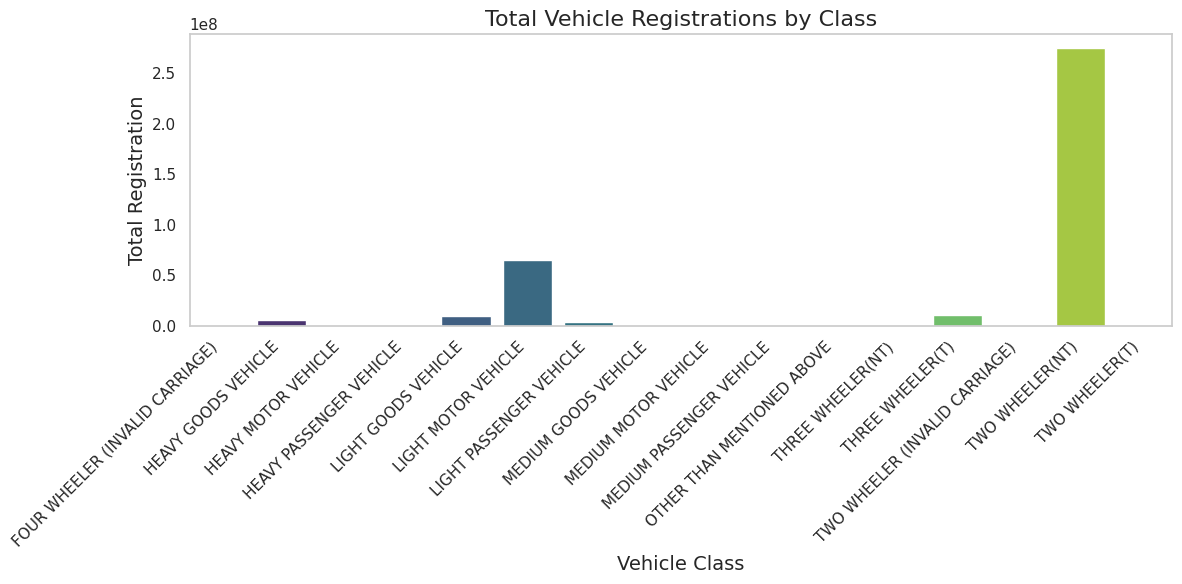

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_vehicle_class, x='Vehicle Class', y='Total Registration', palette='viridis')

plt.title('Total Vehicle Registrations by Class', fontsize=16)
plt.xlabel('Vehicle Class', fontsize=14)
plt.ylabel('Total Registration', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [52]:
df_sales = pd.read_csv('/content/ev_sales_by_makers_and_cat_15-24.csv')
df_sales['Maker'] = df_sales['Maker'].str.replace('"', '').str.strip()

In [53]:
sales_columns = [str(year) for year in range(2015, 2025)]
df_cluster = df_sales.groupby('Maker')[sales_columns].sum()

In [54]:
scaler = StandardScaler()
sales_scaled = scaler.fit_transform(df_cluster)

In [55]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sales_scaled)
    inertia.append(kmeans.inertia_)

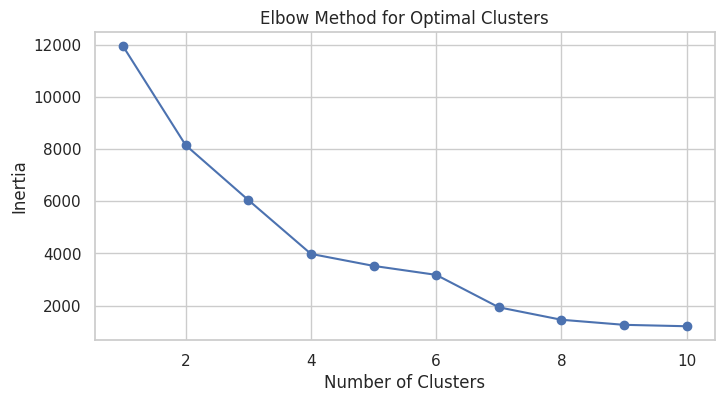

In [56]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [57]:
optimal_k = 3  # you can change based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(sales_scaled)

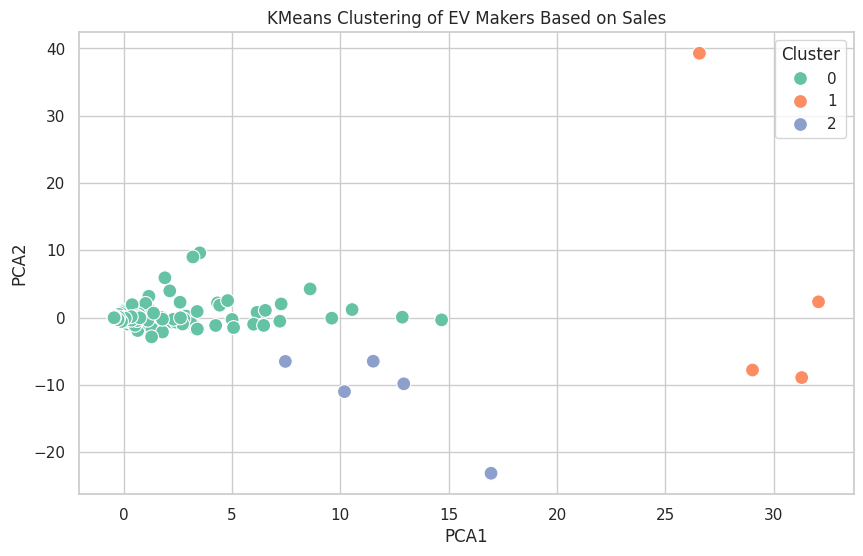

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(sales_scaled)

df_cluster['PCA1'] = pca_result[:, 0]
df_cluster['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('KMeans Clustering of EV Makers Based on Sales')
plt.show()